# Navigation

---

In this notebook, a Deep-Q-Network is composed in order to solve the following project challenge;
[Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

## 1. Imports

We start by importing some useful packages.

In [1]:
from unityagents import UnityEnvironment # Runs the training environment
import numpy as np # General Purpose Data
from dqn_agent_new import Agent # The agent class that handles actions and training
from collections import deque # Used for bundling and extracting data
import matplotlib.pyplot as plt # used for plotting learning results
import torch
%matplotlib inline

This code is made to run on a linux x64 machine. For other training images please refer to the Udacity Github.

## 2. Examine the environment and set parameters

Here, the environment is observed. Opening and closing an environment is not super efficient, but this helps with understanding and must only be done once before training.

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [2]:
observe = False # Set observe to get more Feedback on the environment. Set to false for faster training

if observe == True:
    env = UnityEnvironment(file_name="../BananaFeast/Banana_Linux/Banana.x86_64")
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    env_info = env.reset(train_mode=True)[brain_name]
    # number of agents in the environment
    print('Number of agents:', len(env_info.agents))

    # number of actions
    action_size = brain.vector_action_space_size
    print('Number of actions:', action_size)

    # examine the state space 
    state = env_info.vector_observations[0]
    print('States look like:', state)
    state_size = len(state)
    print('States have length:', state_size)
    env.close()
    agent = Agent(state_size=state_size, action_size=action_size, seed=42)
    
else:
    agent = Agent(state_size=37, action_size=4, seed=42)

## 3. Training the Agent
The dqn function trains an agent

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.31	gained Experience: 30000	current Level: 14	Max Score: 0.80	epsilon: 0.61
Episode 200	Average Score: 0.72	gained Experience: 60000	current Level: 29	Max Score: 0.80	epsilon: 0.37
Episode 300	Average Score: 2.51	gained Experience: 90000	current Level: 44	Max Score: 2.51	epsilon: 0.22
Episode 400	Average Score: 5.30	gained Experience: 120000	current Level: 59	Max Score: 5.31	epsilon: 0.13
Episode 500	Average Score: 6.10	gained Experience: 150000	current Level: 74	Max Score: 6.11	epsilon: 0.08
Episode 600	Average Score: 7.76	gained Experience: 180000	current Level: 89	Max Score: 7.91	epsilon: 0.05
Episode 700	Average Score: 7.31	gained Experience: 210000	current Level: 104	Max Score: 7.91	epsilon: 0.03
Episode 800	Average Score: 6.80	gained Experience: 240000	current Level: 119	Max Score: 7.91	epsilon: 0.02
Episode 900	Average Score: 6.46	gained Experience: 270000	current Level: 134	Max Score: 7.91	epsilon: 0.01
Episode 1000	Average Score: 10.44	gained Exper

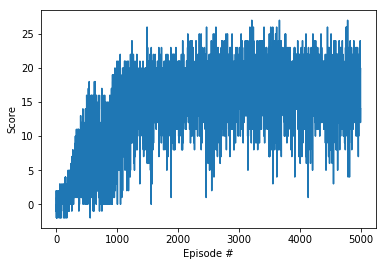

In [3]:
def dqn(n_episodes=1800, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    agent = Agent(state_size=37, action_size=4, seed=42, EPSILON=eps_start)
    env = UnityEnvironment(file_name="../BananaFeast/Banana_Linux/Banana.x86_64")
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]          
        score = 0
        for t in range(max_t):
            action = agent.get_action(state)
            env_info = env.step(action)[brain_name]
            next_state, reward, done = env_info.vector_observations[0], env_info.rewards[0], env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        agent.EPSILON = eps
        if agent.scoremax < np.mean(scores_window): 
            agent.scoremax = np.mean(scores_window)
        exp, lvl, maxscore = agent.get_stats()
        print('\rEpisode {}\tAverage Score: {:.2f}\tgained Experience: {}\tcurrent Level: {}\tMax Score: {:.2f}\tepsilon: {:.2f}'.format(i_episode, np.mean(scores_window), exp, lvl, maxscore, agent.EPSILON), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    if np.mean(scores_window)>=10.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        torch.save(agent.localNet.state_dict(), 'checkpoint4.pth')
    env.close()
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('ninthtry.png')
plt.show()


Text(0.5, 0, 'Episode #')

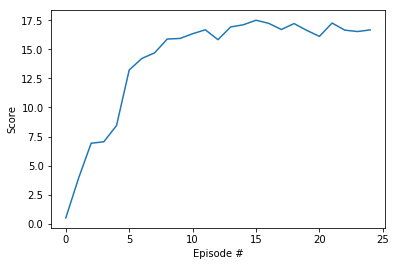

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(avg)), avg)
plt.ylabel('Score')
plt.xlabel('Episode #')

In [13]:
import statistics
avg = []
i = 0
while i < len(scores):
    print(i)
    row = scores[i:i+200]
    x = statistics.mean(row)
    avg.append(x)
    i += 200

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800


## 4. Watch the agent

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [4]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

NameError: name 'env' is not defined

When finished, you can close the environment.